In [1]:
## Overview 

In [2]:
### Import Libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import decomposition
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import time
import sys
sys.path.insert(0,'../../../../../utils')
from helper_functions import *
#import helper_function custom library
from model_builder import ModelBuilder
pd.options.mode.chained_assignment = None
%matplotlib inline 

In [3]:
### Import Data and Clean Data


In [4]:
#load spectra data
df_aug = pd.read_csv("../../../../../data/refCanopies0802_0630.txt")
df_sep = pd.read_csv("../../../../../data/refCanopies0917_0630.txt")
df_oct = pd.read_csv("../../../../../data/refCanopies1016_0630.txt")

#load tree data
df_tree = pd.read_csv("../../../../../data/Export_Output_2_0630.txt")

In [64]:
#load tree data with Genus on
df_tree_genus = pd.read_csv("../../../../../data/Export_Output_2_0630_Genus.txt")
dic = dict(zip(df_tree_genus.SPECIES,df_tree_genus.GENUS))

In [5]:
#clean data
#removes non-vegatation pixels, tRef.NDVI = (tRef.x800_67 - tRef.x679_92) ./ (tRef.x800_67 + tRef.x679_92)
#removes shaded or dark pixels as well, (pixel's reflectance@800_67 <=0.15)
df_aug = data_cleaning(df_tree,df_aug)
df_sep = data_cleaning(df_tree,df_sep)
df_oct = data_cleaning(df_tree,df_oct)

In [54]:
merged_dfs = merge_images([df_aug,df_sep,df_oct])

In [59]:
df_aug.shape,df_sep.shape,df_oct.shape, merged_dfs.shape

((99855, 298), (90440, 298), (84868, 298), (71868, 888))

In [115]:
# #visualizaing data
# fig, axes = plt.subplots(1,4, figsize = (15,5), sharey= True)
# sns.set_context ('talk')

# #august
# sns.countplot(x = 'TARGET',data = df_aug, ax = axes[0], color = 'grey')
# axes[0].tick_params(axis = 'x',rotation = 45)
# axes[0].set_title("August Image")
# axes[0].set_xlabel("Species")
# axes[0].set_ylabel('Count')

# sns.countplot(x='TARGET',data =df_sep, ax = axes[1], color = 'grey')
# axes[1].tick_params(axis = 'x',rotation = 45)
# axes[1].set_title("September Image")
# axes[1].set_xlabel("Species")
# axes[1].set_ylabel('Count')

# sns.countplot(x='TARGET', data =df_oct, ax = axes [2],color = 'grey')
# axes[2].tick_params(axis = 'x',rotation = 45)
# axes[2].set_title("October Image")
# axes[2].set_xlabel("Species")
# axes[2].set_ylabel('Count')

# sns.countplot(x='TARGET', data =merged_dfs, ax = axes [3],color = 'grey')
# axes[3].tick_params(axis = 'x',rotation = 45)
# axes[3].set_title("Merged Image")
# axes[3].set_xlabel("Species")
# axes[3].set_ylabel('Count')

# plt.tight_layout()

In [66]:
#add genus to thee dataframs 
df_aug['Genus'] = df_aug.TARGET.map(dic)
df_sep['Genus'] = df_sep.TARGET.map(dic)
df_oct['Genus'] = df_oct.TARGET.map(dic)
merged_dfs['Genus'] = merged_dfs.TARGET.map(dic)

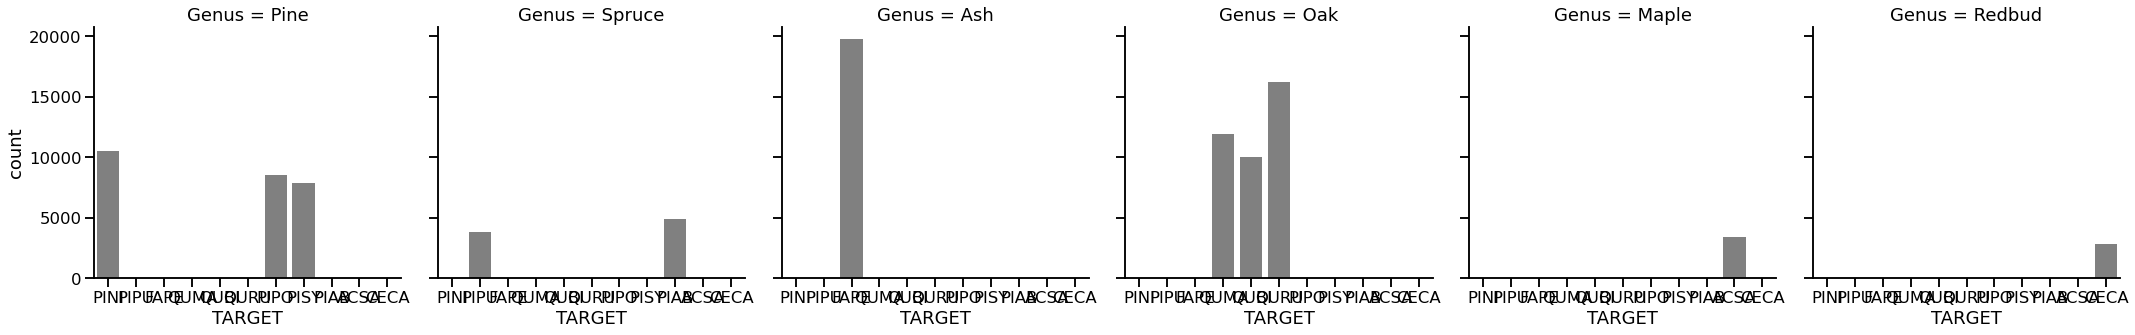

In [69]:
#visualizaing data
#fig, axes = plt.subplots(1,4, figsize = (15,5), sharey= True)
sns.set_context ('talk')

#august
sns.catplot(x = 'TARGET',data = df_aug, col = 'Genus', color = 'grey', kind = 'count')
# axes[0].tick_params(axis = 'x',rotation = 45)
# plt.set_title("August Image")
# axes[0].set_xlabel("Species")
# axes[0].set_ylabel('Count')

# sns.countplot(x='TARGET',data =df_sep, ax = axes[1], color = 'grey')
# axes[1].tick_params(axis = 'x',rotation = 45)
# axes[1].set_title("September Image")
# axes[1].set_xlabel("Species")
# axes[1].set_ylabel('Count')

# sns.countplot(x='TARGET', data =df_oct, ax = axes [2],color = 'grey')
# axes[2].tick_params(axis = 'x',rotation = 45)
# axes[2].set_title("October Image")
# axes[2].set_xlabel("Species")
# axes[2].set_ylabel('Count')

# sns.countplot(x='TARGET', data =merged_dfs, ax = axes [3],color = 'grey')
# axes[3].tick_params(axis = 'x',rotation = 45)
# axes[3].set_title("Merged Image")
# axes[3].set_xlabel("Species")
# axes[3].set_ylabel('Count')

plt.tight_layout()

In [83]:
set(dic.values())

{'Ash', 'Maple', 'Oak', 'Pine', 'Redbud', 'Spruce'}

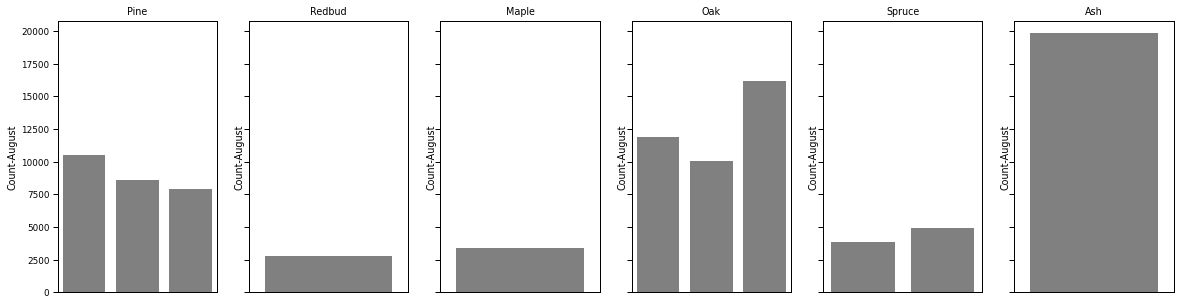

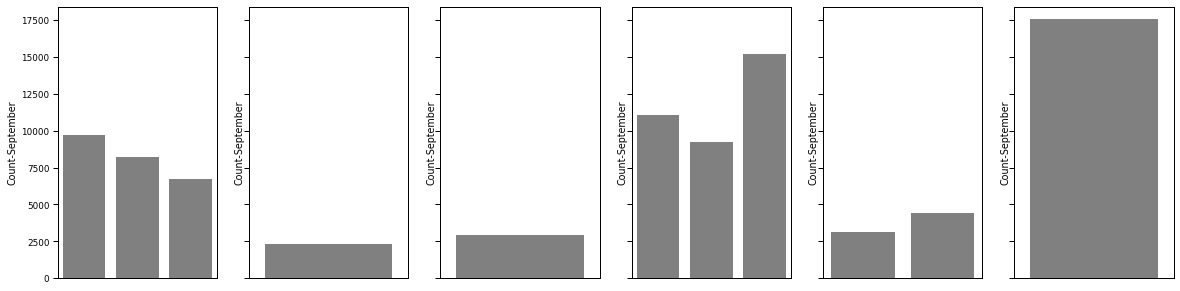

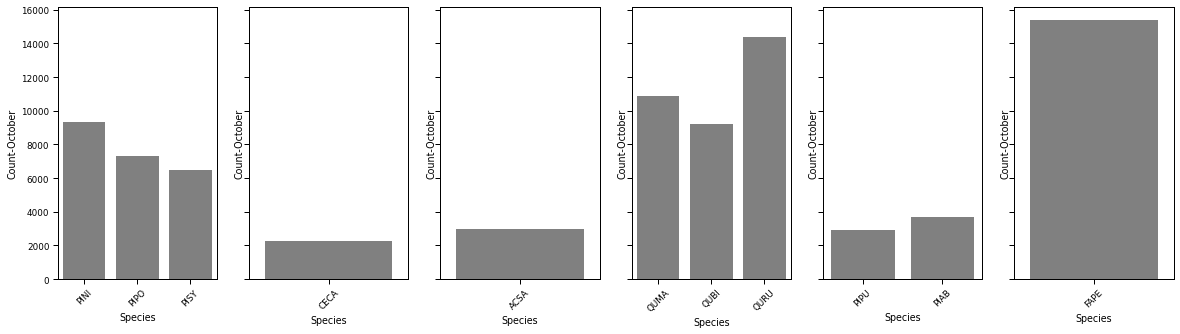

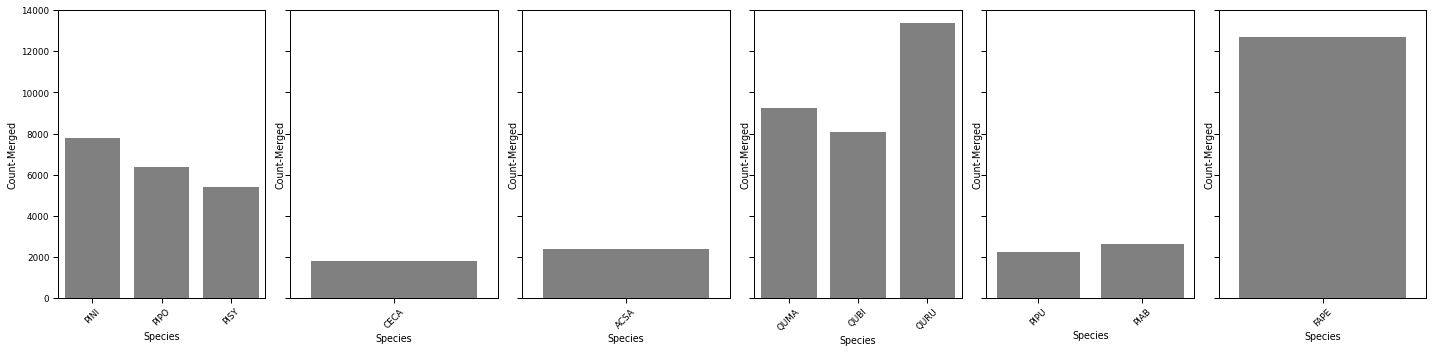

In [116]:
#visualizaing data
fig, axes = plt.subplots(1,6, figsize = (20,5), sharey= True)
sns.set_context ('paper')

#august
genera = list(set(dic.values()))
#for genus in set(dic.values()):
i = 0
while i<6:
    data = df_aug[df_aug.Genus == genera[i]]
    sns.countplot(x = 'TARGET',data =data, ax = axes[i], color = 'grey')
    axes[i].tick_params(axis = 'x',rotation = 45)
    axes[i].set_title(genera[i])
#     axes[i].set_xlabel("Species")
    axes[i].set_ylabel('Count-August')
    axes[i].xaxis.set_visible(False)
    i+=1
 
#sep
fig, axes = plt.subplots(1,6, figsize = (20,5), sharey= True)
sns.set_context ('paper')
i = 0
while i<6:
    data = df_sep[df_sep.Genus == genera[i]]
    sns.countplot(x = 'TARGET',data =data, ax = axes[i], color = 'grey')
    axes[i].tick_params(axis = 'x',rotation = 45)
#     axes[i].set_title(genera[i])
#     axes[i].set_xlabel("Species")
    axes[i].set_ylabel('Count-September')
    axes[i].xaxis.set_visible(False)
    i+=1

#oct
fig, axes = plt.subplots(1,6, figsize = (20,5), sharey= True)
sns.set_context ('paper')
i = 0
while i<6:
    data = df_oct[df_oct.Genus == genera[i]]
    sns.countplot(x = 'TARGET',data =data, ax = axes[i], color = 'grey')
    axes[i].tick_params(axis = 'x',rotation = 45)
#     axes[i].set_title(genera[i])
    axes[i].set_xlabel("Species")
    axes[i].set_ylabel('Count-October')
    axes[i].xaxis.set_visible(True)
    i+=1
#merged
fig, axes = plt.subplots(1,6, figsize = (20,5), sharey= True)
sns.set_context ('paper')
i = 0
while i<6:
    data = merged_dfs[merged_dfs.Genus == genera[i]]
    sns.countplot(x = 'TARGET',data =data, ax = axes[i], color = 'grey')
    axes[i].tick_params(axis = 'x',rotation = 45)
#     axes[i].set_title(genera[i])
    axes[i].set_xlabel("Species")
    axes[i].set_ylabel('Count-Merged')
    i+=1   
plt.tight_layout()

In [122]:
#simple count plots
df_aug.head()

,ROIID,IDwithROI,396.33,398.01,399.7,401.38,403.07,404.75,406.44,408.13,...,888.5,890.22,891.94,893.66,895.38,897.1,898.81,900.53,TARGET,Genus
2,1,3,-0.0028,-0.0016,-0.0002,0.0014,0.0032,0.0052,0.0075,0.0092,...,0.2359,0.2388,0.2425,0.247,0.2526,0.2440,0.2447,0.2451,PINI,Pine
3,1,4,-0.0028,-0.0016,-0.0002,0.0014,0.0032,0.0052,0.0075,0.0092,...,0.2359,0.2388,0.2425,0.247,0.2526,0.2440,0.2447,0.2451,PINI,Pine
4,1,5,0.0064,0.0058,0.0057,0.0058,0.0065,0.0078,0.0080,0.0078,...,0.3044,0.3063,0.3079,0.309,0.3098,0.3109,0.3117,0.3106,PINI,Pine
5,1,6,0.0064,0.0058,0.0057,0.0058,0.0065,0.0078,0.0080,0.0078,...,0.3044,0.3063,0.3079,0.309,0.3098,0.3109,0.3117,0.3106,PINI,Pine
6,1,7,0.0064,0.0058,0.0057,0.0058,0.0065,0.0078,0.0080,0.0078,...,0.3044,0.3063,0.3079,0.309,0.3098,0.3109,0.3117,0.3106,PINI,Pine


In [121]:
df_aug.to_csv("E:/Aime/summer_2021/calmit_git/calmit/analysis/data/aug_data.csv")
#df_aug.head()

In [6]:
### Merge Data and Split Data

In [7]:
#merge data
#column-wise left-join of the three datasets
#join August and September images by extracting common pixels (intersections)
df = merge_images([df_aug,df_sep,df_oct])

In [8]:
### No Dimesion Reduction

In [9]:
#split data 
#features (spectra)
X = df[df.columns[3:]].values
#predictor/target(tree species class)
y = LabelEncoder().fit_transform(df.TARGET) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) #70:30 split, train-test

In [10]:
### Build A Model

In [11]:
model_name = "species_hyper_merged_nd"
merge_nd = RandomForestClassifier(n_estimators = 100,verbose=1, oob_score = True)
merge_nd.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished


RandomForestClassifier(oob_score=True, verbose=1)

In [12]:
labels = ['Sugar Maple', "Eastern Redbud", "Green Ash", 'Norway Spruce','Austrian Pine','Ponderosa Pine',
          'Colorado Spruce', 'Scotch Pine','White Oak','Bur Oak', 'Red Oak']
nclasses = 11
evals = []

In [13]:
#save the model
save_model(merge_nd,model_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


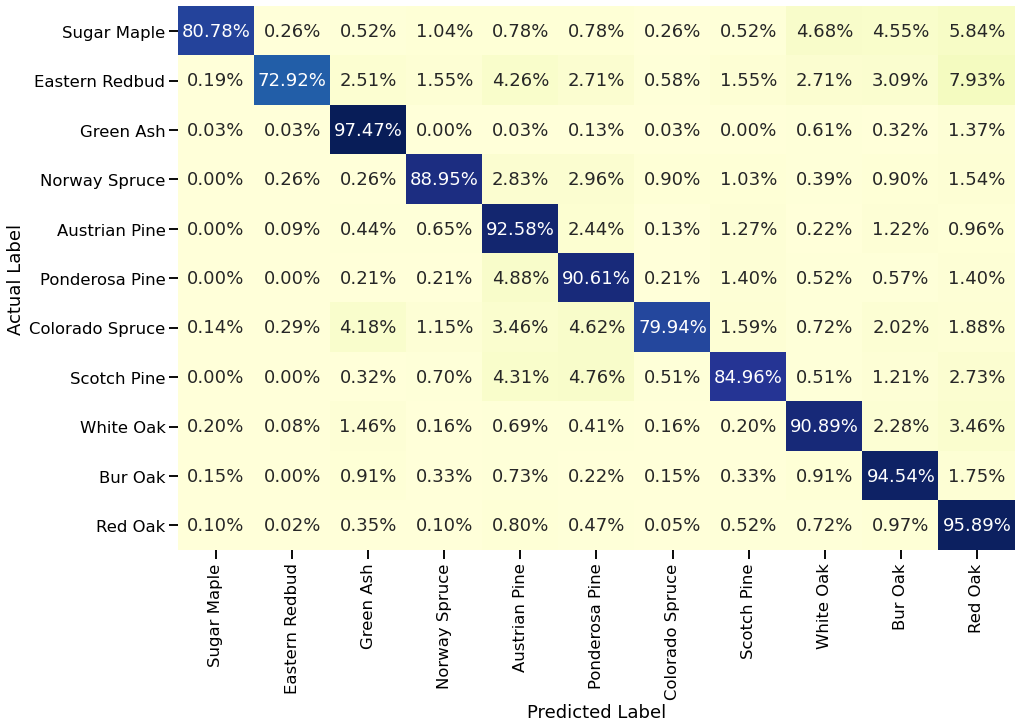

In [14]:
#metrics
train_preds = merge_nd.predict(X_train)
preds = merge_nd.predict(X_test)
train_accuracy = 100*(accuracy_score(train_preds,y_train))
test_accuracy = 100*(accuracy_score(y_test, preds))
generate_cf(model_name,y_test,preds,nclasses,labels)
merge_nd_results =pd.DataFrame.from_dict( {"Model":[model_name], "Train Accuracy(%)":[train_accuracy],
        "Test Accuracy(%)":[test_accuracy]})
evals.append(merge_nd_results)

In [15]:
###Dimension reduction with PCA

In [16]:
#split data 
#features (spectra)
merged_pcs = calculate_pcs(df,df[df.columns[3:]],30)
X = merged_pcs[merged_pcs.columns[:-1]].values
#predictor/target(tree species class)
y = LabelEncoder().fit_transform(merged_pcs.target) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) #70:30 split, train-test

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
71863 -1.952874 -0.958764  1.312716 -0.069740  0.010708  0.148872  0.058626   
71864 -1.901518 -1.066104  1.063700  0.047285  0.041115  0.123836  0.038125   
71865 -1.501070 -1.076446  0.426931  0.130130 -0.070472  0.088286  0.018858   
71866 -1.678345 -1.296387  1.208744  0.052900  0.034852  0.139969  0.044181   
71867 -1.277896 -1.306729  0.571975  0.135744 -0.076736  0.104419  0.024914   

            PC8       PC9      PC10  ...      PC22      PC23      PC24  \
71863  0.006275  0.074686 -0.003122  ...  0.003365 -0.014257  0.011714   
71864 -0.001333  0.064106 -0.000494  ... -0.004239 -0.018820  0.017995   
71865  0.006160  0.050848  0.022848  ... -0.004524 -0.020048  0.015746   
71866 -0.005007  0.053889 -0.000711  ... -0.008655 -0.017216  0.028643   
71867  0.002486  0.040631  0.022630  ... -0.008941 -0.018445  0.026394   

           PC25      PC26      PC27      PC28      PC29      PC30  target  
7186

In [22]:
#build a model with PCA
model_name = "species_hyper_merged_pc"
merge_pc = RandomForestClassifier(n_estimators = 100,verbose=1, oob_score = True)
merge_pc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.6s finished


RandomForestClassifier(oob_score=True, verbose=1)

In [23]:
#save the model
save_model(merge_pc,model_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


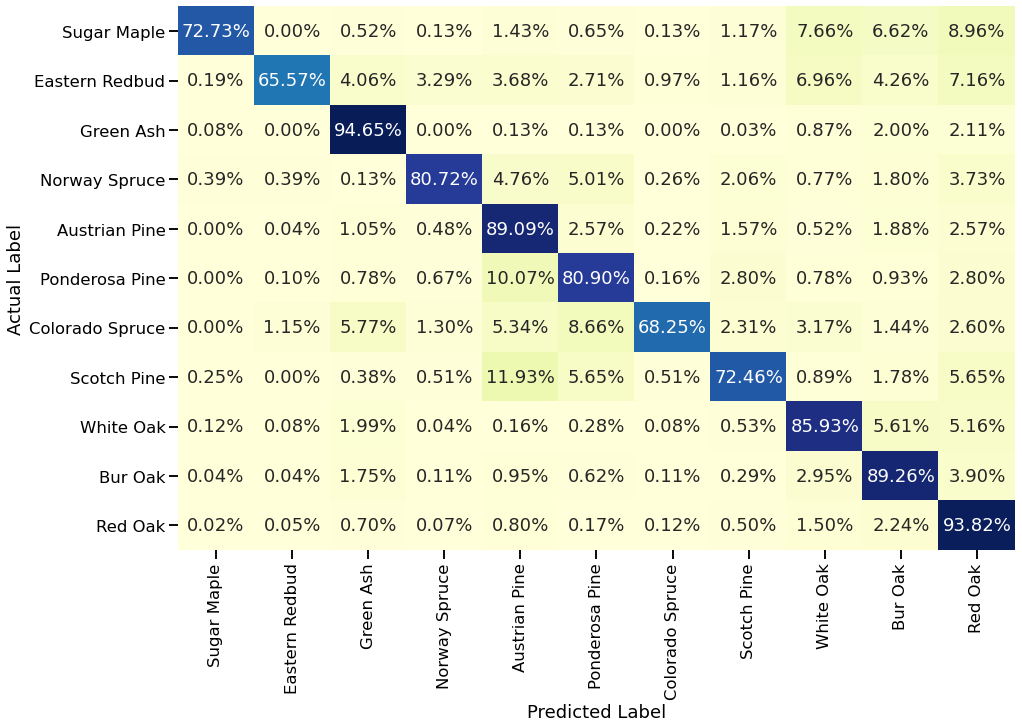

In [24]:
#metrics
train_preds = merge_pc.predict(X_train)
preds = merge_pc.predict(X_test)
train_accuracy = 100*(accuracy_score(train_preds,y_train))
test_accuracy = 100*(accuracy_score(y_test, preds))
generate_cf(model_name,y_test,preds,nclasses,labels)
merge_pc_results =pd.DataFrame.from_dict( {"Model":[model_name], "Train Accuracy(%)":[train_accuracy],
        "Test Accuracy(%)":[test_accuracy]})
evals.append(merge_pc_results)

In [25]:
#complile results
df_results = pd.concat(evals)
df_results

,Model,Train Accuracy(%),Test Accuracy(%)
0,species_hyper_merged_nd,99.9185,91.948425
0,species_hyper_merged_pc,99.9185,86.508047
0,species_hyper_merged_pc,99.9185,86.540513


In [26]:
df_results.to_csv('species_hyper_merged_summary_results.csv')